## importing important libraries


In [1]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import re                                                # for cleaning our tweets
import nltk                                           # for removing stopwords
from textblob import TextBlob                           # for sentiment analysis
import matplotlib.pyplot as plt
from wordcloud import WordCloud                         #for plotting word cloud
import pandas as pd

In [4]:
data = pd.read_csv('Elon_musk.csv',error_bad_lines=False)
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [6]:
data.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [7]:
def clean_tweets(tweets):
  tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
  tweets = re.sub('#', '', tweets) # Removing hashtag(#)
  tweets = re.sub('RT[\s]+', '', tweets) # Removing RT
  tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
  return tweets
 
data.Text = data.Text.apply(clean_tweets)
data.head()

,Text
0,11 I�m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,27 Doge is underestimated
4,Congratulations Tesla China for amazing execu...


## Using TextBlob to genereate subjectivity and polarity

Now we will calculate the subjectivity and polarity of tweets.  

* subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective

* while polarity simply means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment

In [8]:
## let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# function for Polarity
def calc_pola(tweet):
    return TextBlob(tweet).sentiment.polarity
 
data['Subjectivity'] = data.Text.apply(calc_subj)
data['Polarity'] = data.Text.apply(calc_pola)

In [9]:
data.head(10)

,Text,Subjectivity,Polarity
0,11 I�m an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,27 Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
5,Happy New Year of the Ox!,0.727273,0.485227
6,"Frodo was the underdoge,\nAll thought he would...",0.400000,0.000000
7,_ 10 Haha thanks :),0.500000,0.300000
8,10 Indeed! Tweets definitely do not represent...,0.500000,0.000000
9,The most entertaining outcome is the most likely,0.675000,0.375000


## Classifying the sentiments

##### Now we will classify each tweets into different sentiment class which are Positive, Negative and Neutral. So, let’s see how it goes.

In [10]:
# now let's classify these tweets based on their sentiment(polarity)
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
data['Sentiment'] = data.Polarity.apply(sentiment)

In [17]:
data

,Text,Subjectivity,Polarity,Sentiment
0,11 I�m an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Netural
2,Great interview!,0.750000,1.000000,Positive
3,27 Doge is underestimated,0.000000,0.000000,Netural
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Netural
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


## Visualizing the counts of different sentiments

In [12]:
# Okay so, now that we have classified the tweets, let’s see the result with visualization

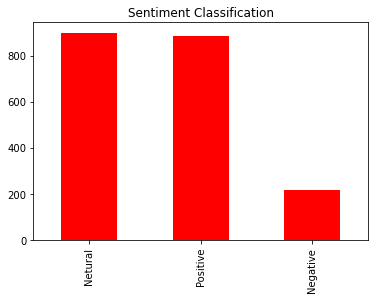

In [13]:
# let's see how many ratio of sentiment
data.Sentiment.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

In [14]:
# let's see the percentage of different sentiment's class
 
# Creat
Df_sentiment = pd.DataFrame(data.Sentiment.value_counts(normalize=True)*100)
 
# calculating percentage
Df_sentiment['Total'] = data.Sentiment.value_counts()

Df_sentiment

,Sentiment,Total
Netural,44.972486,899
Positive,44.272136,885
Negative,10.755378,215


#### We could see that the most of the tweets are neutral and positive. The counts are 899 and 885 respectively for neutral and positive tweets

## Plotting wordcloud

#### Wordcloud is very effective technique to understand the most relevant and frequent words. We can check which words are most frequently occuring words in Elon musk tweets

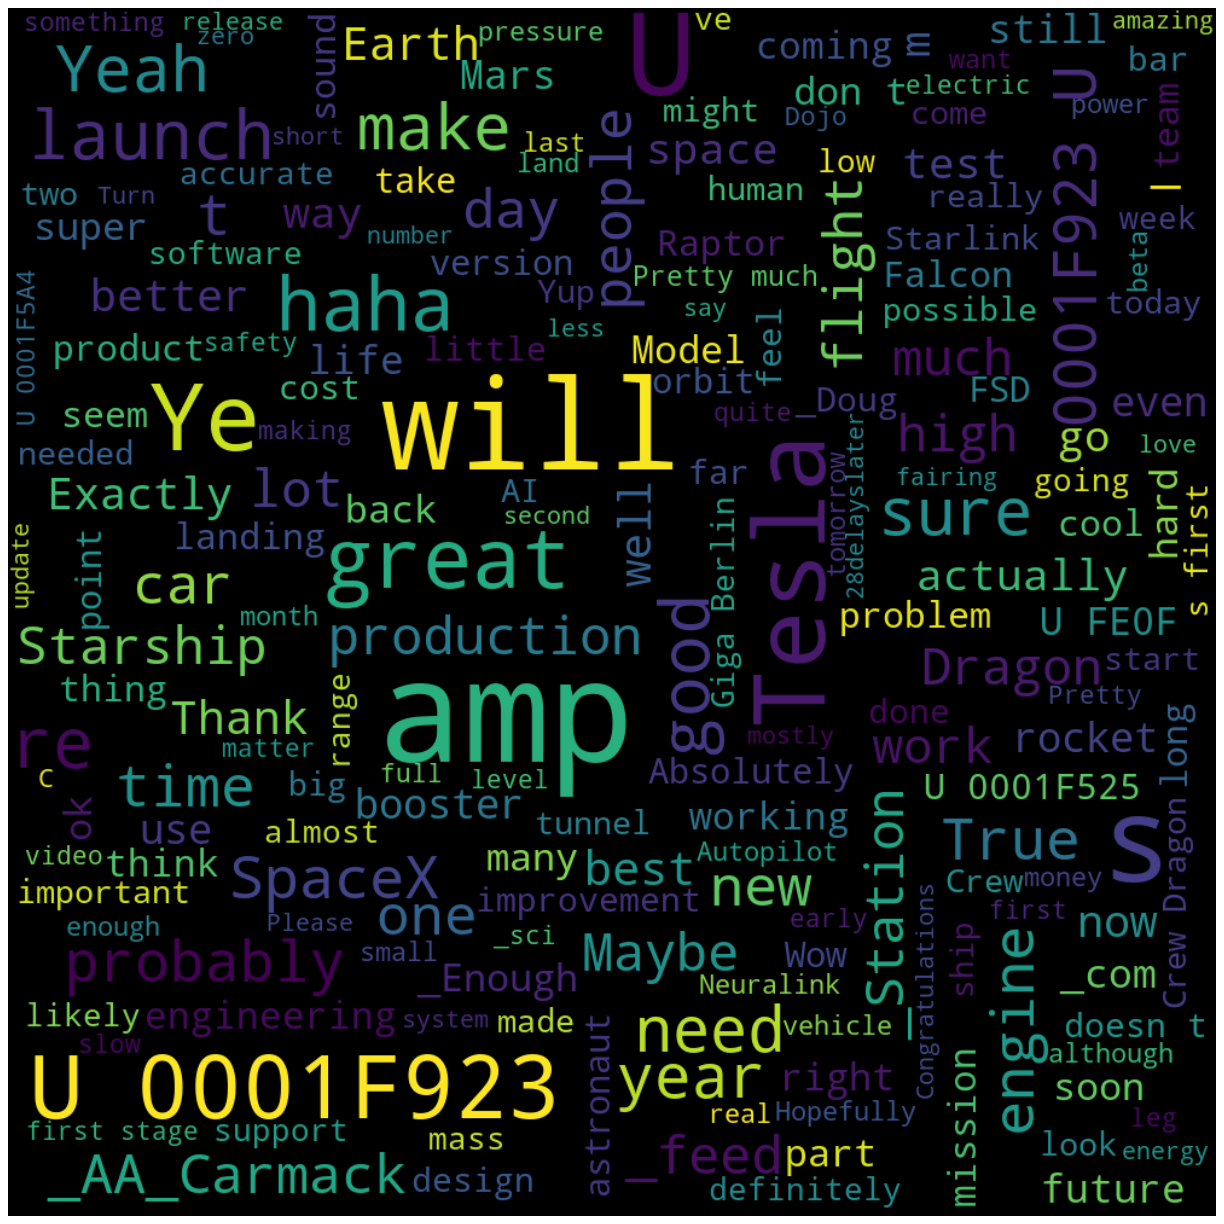

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in data["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### From the above wordcloud, we can see that SpaceX, Starship, Tesla , launch, landing,Starlink, Earts, Mars, etc are the most frequent words by Elon Musk. Most of the words used are related to his company Tesla and space and satellitles launching

## Scatter plot for polarity of tweets

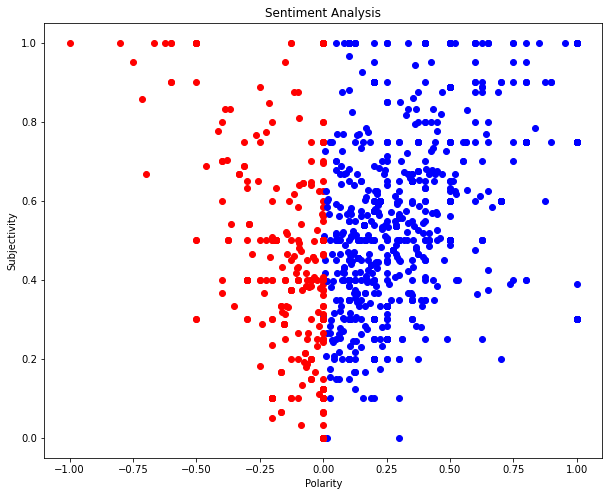

In [21]:
plt.figure(figsize=(10, 8))
for i in range(0, data.shape[0]):
    if(data["Polarity"][i]>0):
        plt.scatter(data["Polarity"][i], data["Subjectivity"][i], color = "Blue")
    else:
        plt.scatter(data["Polarity"][i], data["Subjectivity"][i], color = "Red")
plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

### The tweets which are having polarity score more than 0 (positive words) are in blue colour and the below 0 are in red colour. We could see there are more positive tweets